The present colab file is about weather classification. The dataset exists in a .zip file in the drive downloded from "https://drive.google.com/file/d/1zJtLsAtdDXKBgBpupqw4YhUH0TyB-GBP/view". <br>
The notebook is divided into 5 main parts that are :<br>
1-Connecting to google drive.<br>
2-Extracting, accessing, displaying and managing the dataset.<br>
3-Data augmentation.<br>
4-Labeling
5-Building the CNN model for classification.<br>
6-Training the model on MWD dataset.<br>
7-Performance.<br>
Parts of code are inspired by websites and they are declared in the begining of the corresponding cell. The whole code is perfectly commented and is effectively working.

## Connecting to Google Drive

In [ ]:
# The very first thing to do is to connect the colab file to our drive were we have the dataset downloaded in a .zip file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Extracting, accessing, displaying and managing the dataset

In [ ]:
#In this cell, we are going to unzip the dataset file and extract the images to a specific folder called Weather_data.
import os
import zipfile

if not os.path.exists("Weather_data"):
    os.makedirs("Weather_data")
with zipfile.ZipFile('/content/drive/MyDrive/MWD.zip', "r") as zip_ref:
    zip_ref.extractall("Weather_data")

print("Dataset extracted to:", "Weather_data")

Dataset extracted to: Weather_data


In [ ]:
# In this cell, I am deleting the .ini files because they are useless and to make the work flow easier
if os.path.exists('/content/Weather_data/MWD/train/shine/desktop.ini'):
    os.remove('/content/Weather_data/MWD/train/shine/desktop.ini')
if os.path.exists('/content/Weather_data/MWD/train/rain/desktop.ini'):
    os.remove('/content/Weather_data/MWD/train/rain/desktop.ini')
if os.path.exists('/content/Weather_data/MWD/train/sunrise/desktop.ini'):
    os.remove('/content/Weather_data/MWD/train/sunrise/desktop.ini')
if os.path.exists('/content/Weather_data/MWD/train/cloudy/desktop.ini'):
    os.remove('/content/Weather_data/MWD/train/cloudy/desktop.ini')
if os.path.exists('/content/Weather_data/MWD/test/shine/desktop.ini'):
    os.remove('/content/Weather_data/MWD/test/shine/desktop.ini')
if os.path.exists('/content/Weather_data/MWD/test/rain/desktop.ini'):
    os.remove('/content/Weather_data/MWD/test/rain/desktop.ini')
if os.path.exists('/content/Weather_data/MWD/test/sunrise/desktop.ini'):
    os.remove('/content/Weather_data/MWD/test/sunrise/desktop.ini')
if os.path.exists('/content/Weather_data/MWD/test/cloudy/desktop.ini'):
    os.remove('/content/Weather_data/MWD/test/cloudy/desktop.ini')
if os.path.exists('/content/Weather_data/MWD/train/desktop.ini'):
    os.remove('/content/Weather_data/MWD/train/desktop.ini')

In [ ]:
#Here I am going to merge the test and train datasets to make it easy when making the labeling process and then re split the dataset.
#So this function called merge_directories to merge the two folders with s is the source folder and d is the destination follder.
import shutil

def merge_directories(src, dst):
    for item in os.listdir(src):
        s= os.path.join(src,item)
        d = os.path.join(dst,item)
        shutil.copy2(s, d)

In [ ]:
#In this cell I am applying the function merge_directories
merge_directories('/content/Weather_data/MWD/test/cloudy', '/content/Weather_data/MWD/train/cloudy')
merge_directories('/content/Weather_data/MWD/test/rain', '/content/Weather_data/MWD/train/rain')
merge_directories('/content/Weather_data/MWD/test/shine', '/content/Weather_data/MWD/train/shine')
merge_directories('/content/Weather_data/MWD/test/sunrise', '/content/Weather_data/MWD/train/sunrise')

In [ ]:
# In this cell, I am reading all the images (.png, .jpg and .jpeg) that exist in my dataset.
import cv2
from PIL import Image
path = '/content/Weather_data/MWD/train/'
data_dir = os.listdir('/content/Weather_data/MWD/train/')
# print(data_dir)
for dataset in data_dir:
    imgs=os.listdir('/content/Weather_data/MWD/train/' + dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in imgs:
        if img.endswith('.jpg') or img.endswith('.jpeg') or img.endswith('.png'):
          input_img=cv2.imread('/content/Weather_data/MWD/train/' +  dataset + '/'+ img)
          filename = os.path.join('/content/Weather_data/MWD/train/' +  dataset + '/'+ img)
          image_jpg = Image.open(filename)
          print (img, image_jpg.size)

Loaded the images of dataset-sunrise

sunrise252.jpg (232, 155)
sunrise137.jpg (320, 213)
sunrise296.jpg (266, 160)
sunrise38.jpg (273, 185)
sunrise140.jpg (420, 320)
sunrise156.jpg (280, 180)
sunrise236.jpg (266, 178)
sunrise151.jpg (280, 210)
sunrise348.jpg (271, 181)
sunrise243.jpg (248, 166)
sunrise114.jpg (1280, 720)
sunrise259.jpg (244, 153)
sunrise238.jpg (252, 189)
sunrise70.jpg (600, 524)
sunrise169.jpg (251, 201)
sunrise83.jpg (380, 133)
sunrise71.jpg (341, 512)
sunrise264.jpg (260, 174)
sunrise148.jpg (284, 177)
sunrise24.jpg (292, 173)
sunrise200.jpg (275, 183)
sunrise215.jpg (320, 240)
sunrise176.jpg (1024, 763)
sunrise274.jpg (257, 172)
sunrise126.jpg (190, 265)
sunrise353.jpg (277, 173)
sunrise46.jpg (612, 408)
sunrise291.jpg (300, 112)
sunrise106.jpg (1024, 768)
sunrise284.jpg (249, 166)
sunrise257.jpg (300, 110)
sunrise192.jpg (284, 177)
sunrise164.jpg (300, 168)
sunrise254.jpg (247, 154)
sunrise305.jpg (266, 178)
sunrise78.jpg (768, 1039)
sunrise220.jpg (320, 179)
sun

In [ ]:
# In this cell, I am deleting specific images because they can't be read and resized, I opened them, they do exist but maybe there's something wrong with them
if os.path.exists('/content/Weather_data/MWD/train/shine/shine131.jpg'):
    os.remove('/content/Weather_data/MWD/train/shine/shine131.jpg')
if os.path.exists('/content/Weather_data/MWD/train/rain/rain141.jpg'):
    os.remove('/content/Weather_data/MWD/train/rain/rain141.jpg')

## Data augmentation

In [ ]:
# Here I am applying the data augmentation in order to reduce overfitting.
# The data augmentation code (this and next cell) is inspired by the code found in this: "https://www.geeksforgeeks.org/python-data-augmentation/"
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(rotation_range = 90,shear_range = 0.2, zoom_range = 0.5, horizontal_flip = True, brightness_range = (0.5, 1.5))

In [ ]:
#In this cell, I am applying the data augmentation using flow generator
data_dir_list = os.listdir(path)
for dataset in data_dir_list:
    imgs = os.listdir('/content/Weather_data/MWD/train/' + dataset)
    for img in imgs:
      img = load_img('/content/Weather_data/MWD/train/' + dataset+ '/' + img)
      x = img_to_array(img)  #converting the image to a NumPy array
      x = x.reshape((1, ) + x.shape) #reshaping the array to have a batch size of 1
      i = 0
      for batch in datagen.flow(x, batch_size = 1,save_prefix =dataset, save_to_dir='/content/Weather_data/MWD/train/' +dataset, save_format ='jpg'):
        i += 1
        if i > 5:
          break #breaking the loop after generating 5 augmented images for each original image.

In [ ]:
# Here, I am displaying the final total number of images in the dataset and the size of each class
data_dir_list = os.listdir(path)
nb=0
for dataset in data_dir_list:
    imgs = os.listdir('/content/Weather_data/MWD/train/' + dataset)
    print('Number of samples in', dataset , ' = ', len(imgs))
    nb+=len(imgs)
print('Total number of images', nb)

Number of samples in sunrise  =  2279
Number of samples in rain  =  1428
Number of samples in cloudy  =  1948
Number of samples in shine  =  1650
Total number of images 7305


## Labeling

In [ ]:
# Here, I'm starting the labeling process by associating a label to the whole image for classification.
#For example any image of cloudy weather will have a label '0'
import numpy as np
path = '/content/Weather_data/MWD/train/'
data_dir_list = os.listdir('/content/Weather_data/MWD/train/')
labels = np.ones((nb,),dtype='int64') # Initializing the array for labels
num_classes = 4 #we have 4 classes;
idx=0
img_data_list=[]

for dataset in data_dir_list:
    img_list=os.listdir('/content/Weather_data/MWD/train/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        if img.endswith('.jpg')or img.endswith('.jpeg') or img.endswith('.png'): #In the dataset some images have the extensions .jpeg and .png they should be considered.
          images_path = os.path.join(path + dataset +'/'+ img)
          input_img=cv2.imread(images_path)
          input_img_resize=cv2.resize(input_img,(128,128)) #Resizing the images to be able to be treated by the classification model
          img_data_list.append(input_img_resize)
          if dataset=='cloudy':
              labels[idx]=0
          if dataset == 'rain':
              labels[idx]=1
          if dataset =='shine':
              labels[idx]=2
          if dataset=='sunrise':
              labels[idx]=3
          idx= idx+1

Loaded the images of dataset-sunrise

Loaded the images of dataset-rain

Loaded the images of dataset-cloudy

Loaded the images of dataset-shine



In [ ]:
print(labels[0], labels[-1]) # I printed this to make sure if our labels have been correctly added.
# I am printing the labels and the notal number of images to see if they are equal or not. I faced a problem previously that the labels are much more than images then I corrected it.
print(len(labels))
print(len(img_data_list))

3 2
7305
7305


In [ ]:
img_data = np.array(img_data_list, dtype=object) # Converting the list of image data to a np array
print(len(img_data_list))
img_data = img_data.astype('float32') # Converting the data type of img_data to float32
img_data /= 255 # Normalization of the pixel values
print (img_data.shape)

7305
(7305, 128, 128, 3)


## Building the CNN model for classification

In [ ]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 972.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=0db97503fb4a1cdf39e0c5f5ef9c51da390ebd4ab15b2d39fd53f8893370ef03
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
# In this cell, I am going to make the re splitting of the dataset to train and test and their corresponding labels
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
num_classes = 4
names = ['cloudy','rain','shine','sunrise']
# converting class labels to on-hot encoding
Y = to_categorical(labels, num_classes)
#Shuffle the dataset with random state=2
x,y = shuffle(img_data, Y, random_state=2)
# Split the dataset with 30% testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
print("X_train size is {} and y_train size is {}".format(X_train.shape,y_train.shape))
print("X_test size is {} and y_test size is {}".format(X_test.shape,y_test.shape))

X_train size is (5844, 128, 128, 3) and y_train size is (5844, 4)
X_test size is (1461, 128, 128, 3) and y_test size is (1461, 4)


In [ ]:
# After trying with the augmentation process, the loss decreased and the overfitting too but still have to optimize more so I aimed to make
#the dataset classes balanced. "https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html"
from imblearn.over_sampling import RandomOverSampler

# Flattening the images into a 2D array
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
ros = RandomOverSampler(random_state=42)
X_resampled_over, y_resampled_over = ros.fit_resample(X_train_flattened, y_train)
X_resampled_over_reshaped = X_resampled_over.reshape(-1, X_train.shape[1], X_train.shape[2], X_train.shape[3])


In [ ]:
# I wanted to try undersmapling as a method of data balancing
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=42)
# X_resampled_under, y_resampled_under = rus.fit_resample(X_train_flattened, y_train)
# X_resampled_under_reshaped = X_resampled_under.reshape(-1, X_train.shape[1], X_train.shape[2], X_train.shape[3])

In [ ]:
#In this cell, I am going to introduce the CNN model by building the layers.
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten,InputLayer
import tensorflow as tf

model = Sequential() # I am creating a sequential model
model.add(InputLayer(input_shape=(128,128,3),name='InputLayer')) # The input layer with shape (128, 128, 3)
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same',name='conv2dLayer1')) #The convolutional layer with 64 filters, kernel size (3,3), ReLU activation, and same padding
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),name='maxpool2dLayer1')) # a max pooling layer with pool size (2,2) and strides (2,2)

model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu',padding='same',name ='conv2dLayer2' ))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),name='maxpool2dLayer2'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',name='conv2dLayer3'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),name='maxpool2dLayer3'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',name='conv2dLayer4'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),name='maxpool2dLayer4'))
model.add(Flatten())# Flattening layer

model.add(Dense(512, activation='relu',name='DenseLayer1'))
model.add(Dropout(0.3))# Dropout layer is added to reduce overfitting
model.add(Dense(512, activation='relu',name = 'DenseLayer2'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu',name='DenseLayer3'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax',name='outputLayer'))

opt = tf.keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2dLayer1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 maxpool2dLayer1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2dLayer2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 maxpool2dLayer2 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2dLayer3 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 maxpool2dLayer3 (MaxPoolin  (None, 16, 16, 64)        0

## Training the model on the MWD dataset

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='/content/Weather_data/Weather_CNN.weights.best.hdf5', verbose=1,save_best_only=True)
history = model.fit(X_resampled_over_reshaped, y_resampled_over, batch_size=64, epochs=20, validation_data=(X_test, y_test), verbose=True,callbacks=[checkpointer])

Epoch 1/20
112/112 [==============================] - ETA: 0s - loss: 0.7834 - accuracy: 0.6614
Epoch 1: val_loss improved from inf to 0.52978, saving model to /content/Weather_data/Weather_CNN.weights.best.hdf5
112/112 [==============================] - 387s 3s/step - loss: 0.7834 - accuracy: 0.6614 - val_loss: 0.5298 - val_accuracy: 0.7871
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


112/112 [==============================] - ETA: 0s - loss: 0.5040 - accuracy: 0.8117
Epoch 2: val_loss improved from 0.52978 to 0.40110, saving model to /content/Weather_data/Weather_CNN.weights.best.hdf5
112/112 [==============================] - 365s 3s/step - loss: 0.5040 - accuracy: 0.8117 - val_loss: 0.4011 - val_accuracy: 0.8706
Epoch 3/20
112/112 [==============================] - ETA: 0s - loss: 0.4036 - accuracy: 0.8537
Epoch 3: val_loss improved from 0.40110 to 0.38155, saving model to /content/Weather_data/Weather_CNN.weights.best.hdf5
112/112 [==============================] - 359s 3s/step - loss: 0.4036 - accuracy: 0.8537 - val_loss: 0.3816 - val_accuracy: 0.8645
Epoch 4/20
112/112 [==============================] - ETA: 0s - loss: 0.3216 - accuracy: 0.8843
Epoch 4: val_loss improved from 0.38155 to 0.34870, saving model to /content/Weather_data/Weather_CNN.weights.best.hdf5
112/112 [==============================] - 366s 3s/step - loss: 0.3216 - accuracy: 0.8843 - val_los

In [ ]:
# Saving the trained model to the 'saved_model' directory with the name 'my_model'
!mkdir -p saved_model
model.save('saved_model/my_model')

## Performance

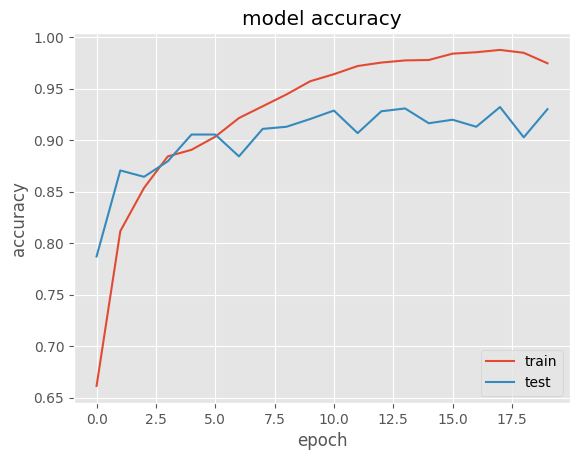

In [ ]:
#In this and upcoming cells, I tried to plot train and test accuracy and loss. "https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/"
import matplotlib.pyplot as plt
#summarize history for accuracy
plt.style.use("ggplot")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

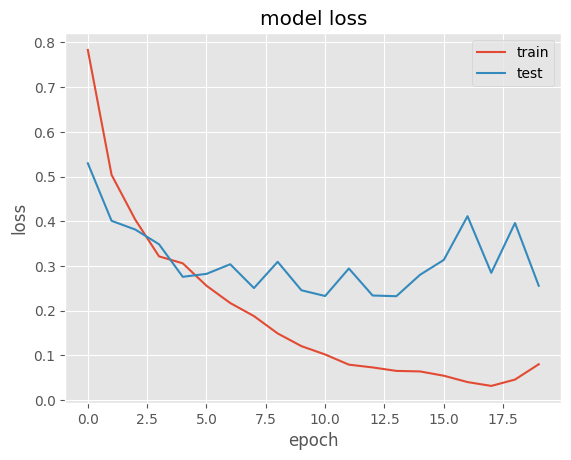

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss',)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Text(0.5, 0, 'epoch')

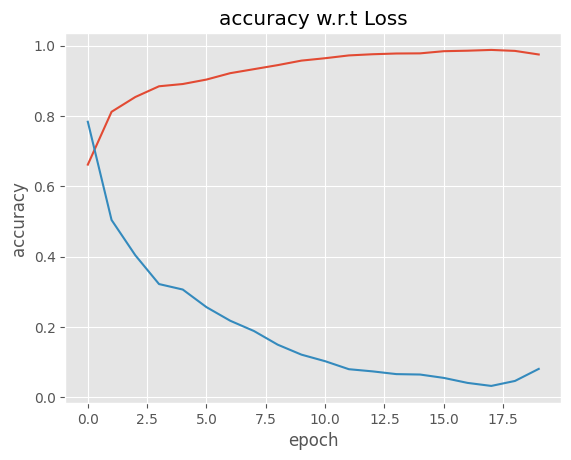

In [ ]:
# Accuracy history with loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('accuracy w.r.t Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [ ]:
# loading the weights that gave us the best validation accuracy
model.load_weights('/content/Weather_data/Weather_CNN.weights.best.hdf5')

In [ ]:
#Evaluating the model the train loss and accuracy
score_train = model.evaluate(X_train, y_train, verbose=1)

print('the train Loss:{:.3f}%'.format(score_train[0]*100))
print('the train accuracy:{:.3f}%'.format(score_train[1]*100))

183/183 [==============================] - 70s 382ms/step - loss: 0.0233 - accuracy: 0.9926
the train Loss:2.332%
the train accuracy:99.264%


In [ ]:
# Evaluating the model test loss andaccuracy
score_test = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss:{:.3f}%'.format(score_test[0]*100))
print('Test accuracy:{:.3f}%'.format(score_test[1]*100))

46/46 [==============================] - 17s 372ms/step - loss: 0.2325 - accuracy: 0.9309
Test Loss:23.245%
Test accuracy:93.087%


In [ ]:
# y_pred = model.predict(X_test)
# print(np.argmax(y_pred,axis=-1))

1/1 [==============================] - 0s 259ms/step


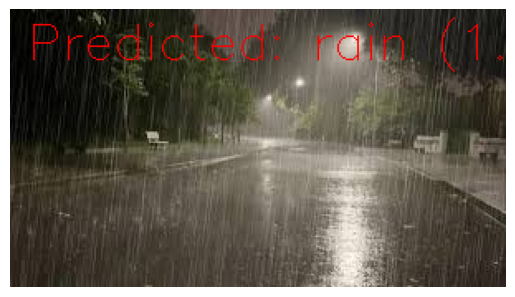

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Loading the trained model
model = load_model('saved_model/my_model')
img_path = '/content/drive/MyDrive/rarai.jpg'
img = image.load_img(img_path, target_size=(128, 128))
img_array= image.img_to_array(img)
img_array= np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to [0, 1]

#Making predictions using our saved model
preds = model.predict(img_array)
#Getting the predicted class and probability
pred_class = np.argmax(preds)
pred_probability = preds[0, pred_class]
#Getting the class label based on your model's class indices or labels
pred_label = names[pred_class]

#Loading the original image using OpenCV for further processing
original_img = cv2.imread(img_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

#Drawing the predicted label on the image
font= cv2.FONT_HERSHEY_SIMPLEX
#The font_scale, font thickness and txt_pos should be changed depending on the size of the images we are testing
font_scale= 1
font_thickness= 1
txt= f'Predicted: {pred_label} ({pred_probability:.2f})'
txt_size= cv2.getTextSize(txt, font, font_scale, font_thickness)[0]
txt_pos= (10, 30)

cv2.putText(original_img, txt, txt_pos, font, font_scale, (255, 0, 0), font_thickness)
#Displaying the image with the predicted label
plt.imshow(original_img)
plt.axis('off')
plt.show()
